In [36]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [37]:
df = pd.read_csv("final_data2.csv")
printable = df.describe(
    include="all",
)
print(printable)

          Unnamed: 0             App                     App Id Category  \
count    6250.000000            6250                       6250     6250   
unique           NaN            2974                       4382       48   
top              NaN  Bubble Shooter  com.elsayad.bubbleshooter    Tools   
freq             NaN             282                         12      783   
mean     4129.084960             NaN                        NaN      NaN   
std      2884.102866             NaN                        NaN      NaN   
min         6.000000             NaN                        NaN      NaN   
25%      1882.000000             NaN                        NaN      NaN   
50%      3313.000000             NaN                        NaN      NaN   
75%      6003.250000             NaN                        NaN      NaN   
max     10836.000000             NaN                        NaN      NaN   

       Content Rating       Rating  Rating Count    Installs  \
count            6250  

In [38]:
def installs_formating(obj):
    obj = obj.replace("+", "")
    obj = obj.replace(",", "")
    return int(obj)


def size_formatting(obj):
    obj = obj.replace(",", "")

    if obj.endswith("M"):
        return float(obj[:-1]) * 1e6
    elif obj.endswith("k"):
        return float(obj[:-1]) * 1e3
    elif obj.endswith("G"):
        return float(obj[:-1]) * 1e9

    else:
        return np.nan

In [39]:
df["Size"] = df["Size"].apply(size_formatting)
df["Installs"] = df["Installs"].apply(installs_formating)

In [40]:
c = 0
from math import isclose

for i in range(len(df["Reviews"])):
    if isclose(df["Reviews"][i], df["Rating Count"][i], rel_tol=1):
        c += 1
print("ratio = ", c * 100 / len(df["Reviews"]))

ratio =  91.936


In [41]:
c = 0
for i in range(len(df["Free"])):
    if df["Free"][i] and df["Price"][i] == 0.0:
        c += 1
print("ratio = ", c * 100 / len(df["Reviews"]))

ratio =  94.272


In [42]:
c = 0
from math import isclose

for i in range(len(df["Installs"])):
    # print(
    #     df["Installs"][i],
    #     df["Minimum Installs"][i],
    # )
    if isclose(df["Installs"][i], df["Minimum Installs"][i], rel_tol=100):
        c += 1
print("ratio = ", c * 100 / len(df["Minimum Installs"]))

ratio =  100.0


In [43]:
def show_types(df):
    for col in df.columns:
        print(col, "=", df[col][0], "=", type(df[col][0]))


show_types(df)

Unnamed: 0 = 2241 = <class 'numpy.int64'>
App = Minecraft = <class 'str'>
App Id = com.mojang.minecraftpe = <class 'str'>
Category = Arcade = <class 'str'>
Content Rating = Everyone 10+ = <class 'str'>
Rating = 4.555742 = <class 'numpy.float64'>
Rating Count = 4094883.0 = <class 'numpy.float64'>
Installs = 10000000 = <class 'numpy.int64'>
Minimum Installs = 10000000 = <class 'numpy.int64'>
Metric = 13894853.71 = <class 'numpy.float64'>
Reviews = 2090646 = <class 'numpy.int64'>
Free = False = <class 'numpy.bool_'>
Price = 7.49 = <class 'numpy.float64'>
Currency = USD = <class 'str'>
minimum income = 74900000.0 = <class 'numpy.float64'>
Ad Supported = nan = <class 'float'>
In app purchases = True = <class 'numpy.bool_'>
Size = nan = <class 'numpy.float64'>
Version = 1.16.221.01 = <class 'str'>
Last update = 21-Apr-21 = <class 'str'>
Released = 15-Aug-11 = <class 'str'>
Android version Text = Varies with device = <class 'str'>
Editor Choice = True = <class 'numpy.bool_'>
Developer Id = 4.

In [44]:
def print_nulls(df: pd.DataFrame):
    mask = df.isna()
    sns.heatmap(
        mask,
        cbar=False,
    )
    print(mask.sum())

In [45]:
df["Rating Count"].__contains__(0)

True

Unnamed: 0                  0
App                         0
App Id                      0
Category                    0
Content Rating              0
Rating                      1
Rating Count              504
Installs                    0
Minimum Installs            0
Metric                      0
Reviews                     0
Free                        0
Price                       0
Currency                    0
minimum income              0
Ad Supported             1970
In app purchases            0
Size                      877
Version                     3
Last update                 0
Released                   83
Android version Text        9
Editor Choice               0
Developer Id                0
Developer Website        1115
Developer Email             0
Privacy Policy            515
Developer                   0
Developer Address        1744
Developer Internal ID       0
Summary                     3
dtype: int64


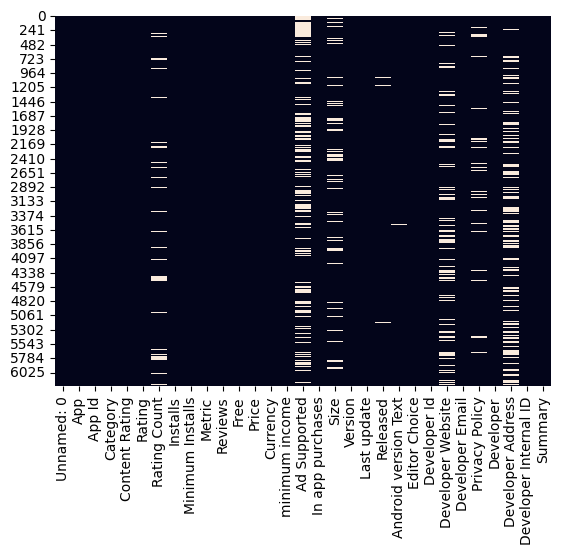

In [46]:
print_nulls(df)

In [47]:
_columns = df.select_dtypes(include=["number"]).columns
df[_columns] = df[_columns].fillna(df[_columns].mean())

In [48]:
_columns

Index(['Unnamed: 0', 'Rating', 'Rating Count', 'Installs', 'Minimum Installs',
       'Metric', 'Reviews', 'Price', 'minimum income', 'Size',
       'Developer Internal ID'],
      dtype='object')

In [49]:
show_types(df)

Unnamed: 0 = 2241 = <class 'numpy.int64'>
App = Minecraft = <class 'str'>
App Id = com.mojang.minecraftpe = <class 'str'>
Category = Arcade = <class 'str'>
Content Rating = Everyone 10+ = <class 'str'>
Rating = 4.555742 = <class 'numpy.float64'>
Rating Count = 4094883.0 = <class 'numpy.float64'>
Installs = 10000000 = <class 'numpy.int64'>
Minimum Installs = 10000000 = <class 'numpy.int64'>
Metric = 13894853.71 = <class 'numpy.float64'>
Reviews = 2090646 = <class 'numpy.int64'>
Free = False = <class 'numpy.bool_'>
Price = 7.49 = <class 'numpy.float64'>
Currency = USD = <class 'str'>
minimum income = 74900000.0 = <class 'numpy.float64'>
Ad Supported = nan = <class 'float'>
In app purchases = True = <class 'numpy.bool_'>
Size = 27900393.07649358 = <class 'numpy.float64'>
Version = 1.16.221.01 = <class 'str'>
Last update = 21-Apr-21 = <class 'str'>
Released = 15-Aug-11 = <class 'str'>
Android version Text = Varies with device = <class 'str'>
Editor Choice = True = <class 'numpy.bool_'>
Dev

Unnamed: 0                  0
App                         0
App Id                      0
Category                    0
Content Rating              0
Rating                      0
Rating Count                0
Installs                    0
Minimum Installs            0
Metric                      0
Reviews                     0
Free                        0
Price                       0
Currency                    0
minimum income              0
Ad Supported             1970
In app purchases            0
Size                        0
Version                     3
Last update                 0
Released                   83
Android version Text        9
Editor Choice               0
Developer Id                0
Developer Website        1115
Developer Email             0
Privacy Policy            515
Developer                   0
Developer Address        1744
Developer Internal ID       0
Summary                     3
dtype: int64


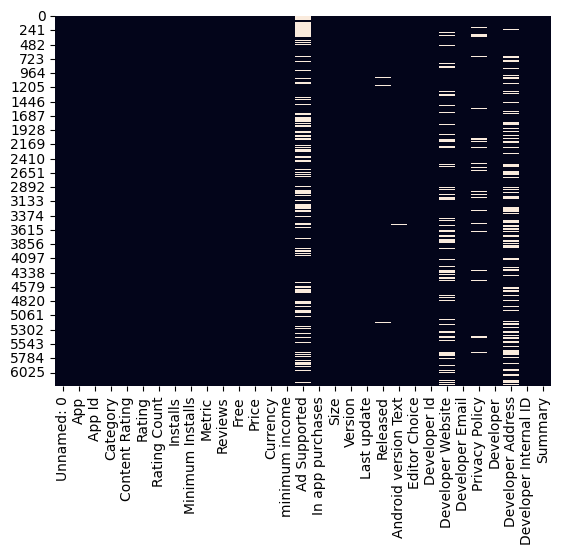

In [50]:
print_nulls(df)

In [51]:
_columns = df.select_dtypes(exclude=["number"]).columns
df[_columns] = df[_columns].fillna(df[_columns].mode().iloc[0])

Unnamed: 0               0
App                      0
App Id                   0
Category                 0
Content Rating           0
Rating                   0
Rating Count             0
Installs                 0
Minimum Installs         0
Metric                   0
Reviews                  0
Free                     0
Price                    0
Currency                 0
minimum income           0
Ad Supported             0
In app purchases         0
Size                     0
Version                  0
Last update              0
Released                 0
Android version Text     0
Editor Choice            0
Developer Id             0
Developer Website        0
Developer Email          0
Privacy Policy           0
Developer                0
Developer Address        0
Developer Internal ID    0
Summary                  0
dtype: int64


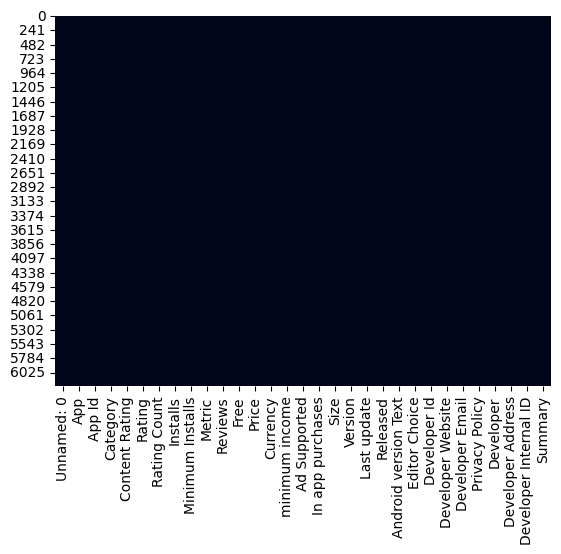

In [52]:
print_nulls(df)

In [53]:
_columns = [col for col in df.select_dtypes(include="number").columns]
_columns.remove("Developer Internal ID")
_columns.remove("Unnamed: 0")

for col in _columns:
    scaler = MinMaxScaler()
    df[col] = scaler.fit_transform(df[[col]])

In [54]:
_columns

['Rating',
 'Rating Count',
 'Installs',
 'Minimum Installs',
 'Metric',
 'Reviews',
 'Price',
 'minimum income',
 'Size']

In [55]:
_columns

['Rating',
 'Rating Count',
 'Installs',
 'Minimum Installs',
 'Metric',
 'Reviews',
 'Price',
 'minimum income',
 'Size']

In [56]:
for col in _columns:
    counter = 0
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(Q1, "-", Q3)
    mean = df[col].mean()
    for i in range(len(df[col])):

        if (df[col][i] > (1.5 * IQR) + Q3) or (df[col][i] < (Q1 - (1.5 * IQR))):
            # print(col, "=", i, "=", df[col][i], "=", df[col].mean())
            counter += 1
            df[col][i] = mean
    print(col, " outlier ratio=", counter * 100 / len(df[col]))

0.7655406650000001 - 0.8903139200000001


C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel

Rating  outlier ratio= 11.008
2.9306536153257178e-06 - 0.001866104961303325


C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel

Rating Count  outlier ratio= 19.104
2e-06 - 0.002


C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel

Installs  outlier ratio= 12.496
2e-06 - 0.002


C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel

Minimum Installs  outlier ratio= 12.496
1.9069320649777576e-06 - 0.0018560853670603144


C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel

Metric  outlier ratio= 12.496
1.083665789956961e-06 - 0.0007268146453241339


C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel

Reviews  outlier ratio= 17.648
0.0 - 0.0
Price  outlier ratio= 5.728
0.0 - 0.0


C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel

minimum income  outlier ratio= 5.728
0.005990059900599006 - 0.029081199902908122
Size  outlier ratio= 8.672


C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel_12044\2792714279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean
C:\Users\SARFA\AppData\Local\Temp\ipykernel

In [57]:
df.columns

Index(['Unnamed: 0', 'App', 'App Id', 'Category', 'Content Rating', 'Rating',
       'Rating Count', 'Installs', 'Minimum Installs', 'Metric', 'Reviews',
       'Free', 'Price', 'Currency', 'minimum income', 'Ad Supported',
       'In app purchases', 'Size', 'Version', 'Last update', 'Released',
       'Android version Text', 'Editor Choice', 'Developer Id',
       'Developer Website', 'Developer Email', 'Privacy Policy', 'Developer',
       'Developer Address', 'Developer Internal ID', 'Summary'],
      dtype='object')

In [58]:
df = df.drop(
    columns=[
        "Privacy Policy",
        "Developer Email",
        "Developer Website",
        "Summary",
        "Developer Internal ID",  # not necessary
        "Free",
        "Minimum Installs",
        "Rating Count",  # correlated
    ]
)

In [59]:
_columns = [col for col in df.select_dtypes(include="number").columns]
_columns

['Unnamed: 0',
 'Rating',
 'Installs',
 'Metric',
 'Reviews',
 'Price',
 'minimum income',
 'Size']

In [60]:
for col in _columns:
    print(col, "-", df[col].min(), "=", df[col].max())

Unnamed: 0 - 6 = 10836
Rating - 0.58 = 1.0
Installs - 0.0 = 0.011068796366016
Metric - 0.0 = 0.010809253166061177
Reviews - 0.0 = 0.008571486930581188
Price - 0.0 = 0.0031764456445644565
minimum income - 0.0 = 0.0006481591004325767
Size - 0.0 = 0.0636269999063627


In [61]:
labels = ["Very Low", "Low", "Medium", "High", "Very High"]
for col in _columns:
    max = df[col].max()
    bins = [-1, max * 0.2, max * 0.4, max * 0.6, max * 0.8, max * 1]

    df[col + "Categorized"] = pd.cut(df[col], bins=bins, labels=labels)

In [62]:
cat_cols = []
for col in _columns:
    cat_cols.append(col)
    cat_cols.append(col + "Categorized")
df[cat_cols]

Unnamed: 0 Unnamed: 0Categorized    Rating RatingCategorized  \
0           2241                   Low  0.911148         Very High   
1           4347                Medium  0.911148         Very High   
2           5490                Medium  0.876121         Very High   
3           4034                   Low  0.881289         Very High   
4           7417                  High  0.825836         Very High   
...          ...                   ...       ...               ...   
6245        1889              Very Low  1.000000         Very High   
6246        1678              Very Low  0.762187              High   
6247        1715              Very Low  0.762187              High   
6248        1882              Very Low  0.762187              High   
6249        2010              Very Low  0.762187              High   

          Installs InstallsCategorized        Metric MetricCategorized  \
0     2.000000e-03            Very Low  4.628988e-03            Medium   
1     2.000000e-03            Very Low  4.628988e-03            Medium   
2     1.000000e-03            Very Low  1.041831e-03          Very Low   
3     2.000000e-03            Very Low  2.396883e-03               Low   
4     2.000000e-04            Very Low  5.670824e-04          Very Low   
...            ...                 ...           ...               ...   
6245  2.000000e-08            Very Low  2.207080e-08          Very Low   
6246  2.000000e-08            Very Low  1.832292e-08          Very Low   
6247  2.000000e-08            Very Low  1.832292e-08          Very Low   
6248  2.000000e-08            Very Low  1.832292e-08          Very Low   
6249  2.000000e-08            Very Low  1.832292e-08          Very Low   

           Reviews ReviewsCategorized     Price PriceCategorized  \
0     8.571487e-03          Very High  0.003176        Very High   
1     8.571487e-03          Very High  0.003176        Very High   
2     1.487873e-03           Very Low  0.003176        Very High   
3     8.571487e-03          Very High  0.003176        Very High   
4     8.571487e-03          Very High  0.003176        Very High   
...            ...                ...       ...              ...   
6245  9.632585e-08           Very Low  0.000000         Very Low   
6246  0.000000e+00           Very Low  0.000000         Very Low   
6247  0.000000e+00           Very Low  0.000000         Very Low   
6248  0.000000e+00           Very Low  0.000000         Very Low   
6249  0.000000e+00           Very Low  0.000000         Very Low   

      minimum income minimum incomeCategorized      Size SizeCategorized  
0           0.000648                 Very High  0.025354             Low  
1           0.000648                 Very High  0.025354             Low  
2           0.000648                 Very High  0.025354             Low  
3           0.000648                 Very High  0.043627            High  
4           0.000648                 Very High  0.013626             Low  
...              ...                       ...       ...             ...  
6245        0.000000                  Very Low  0.016354             Low  
6246        0.000000                  Very Low  0.012717        Very Low  
6247        0.000000                  Very Low  0.012717        Very Low  
6248        0.000000                  Very Low  0.012717        Very Low  
6249        0.000000                  Very Low  0.012717        Very Low  

[6250 rows x 16 columns]

In [63]:
sport = df[df["Category"] == "Sports"]
print("Ratio = ", 100 * sport["Rating"].mean() / df["Rating"].mean())

Ratio =  99.59675956185298


#### Lemetizing


In [34]:
# lemetization if string columns
# nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

_columns = df.select_dtypes(include="object").columns
_columns

for col in _columns:
    df[col] = df[col].apply(lambda x: lemmatizer.lemmatize(x))

_columns

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SARFA\AppData\Roaming\nltk_data...


Index(['App', 'App Id', 'Category', 'Content Rating', 'Currency', 'Version',
       'Last update', 'Released', 'Android version Text', 'Developer Id',
       'Developer', 'Developer Address'],
      dtype='object')

In [35]:
# Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

_columns = df.select_dtypes(include="object").columns
_columns

for col in _columns:
    df[col] = df[col].apply(lambda x: stemmer.stem(x))

_columns

Index(['App', 'App Id', 'Category', 'Content Rating', 'Currency', 'Version',
       'Last update', 'Released', 'Android version Text', 'Developer Id',
       'Developer', 'Developer Address'],
      dtype='object')

#### Visualization


###### Scatter plots


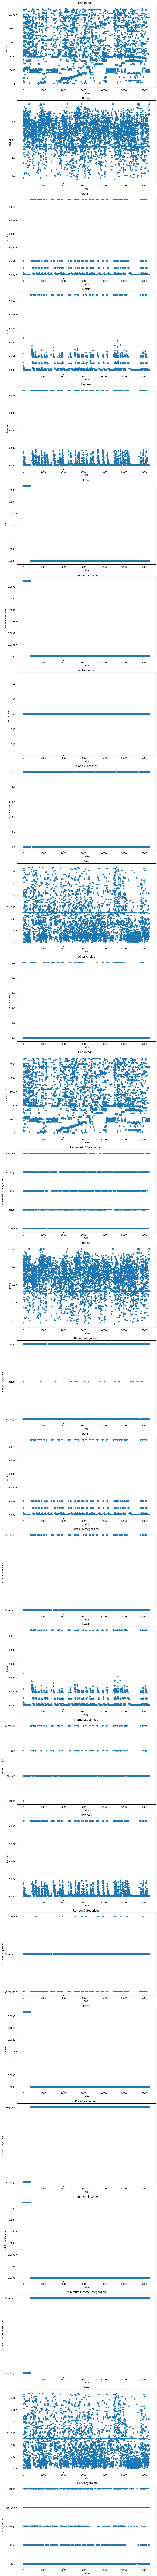

In [32]:
to_show = df.select_dtypes(include=["bool", "number"])
# adding cat_cols to to_show
to_show = pd.concat([to_show, df[cat_cols]], axis=1)
fig, axes = plt.subplots(
    nrows=len(to_show.columns), ncols=1, figsize=(10, 6 * len(to_show.columns))
)

for i, (col_name, col_data) in enumerate(to_show.items()):
    axes[i].scatter(to_show.index, col_data)
    axes[i].set_title(col_name)
    axes[i].set_xlabel("Index")
    axes[i].set_ylabel(col_name)

plt.tight_layout()

plt.show()

###### Box plots


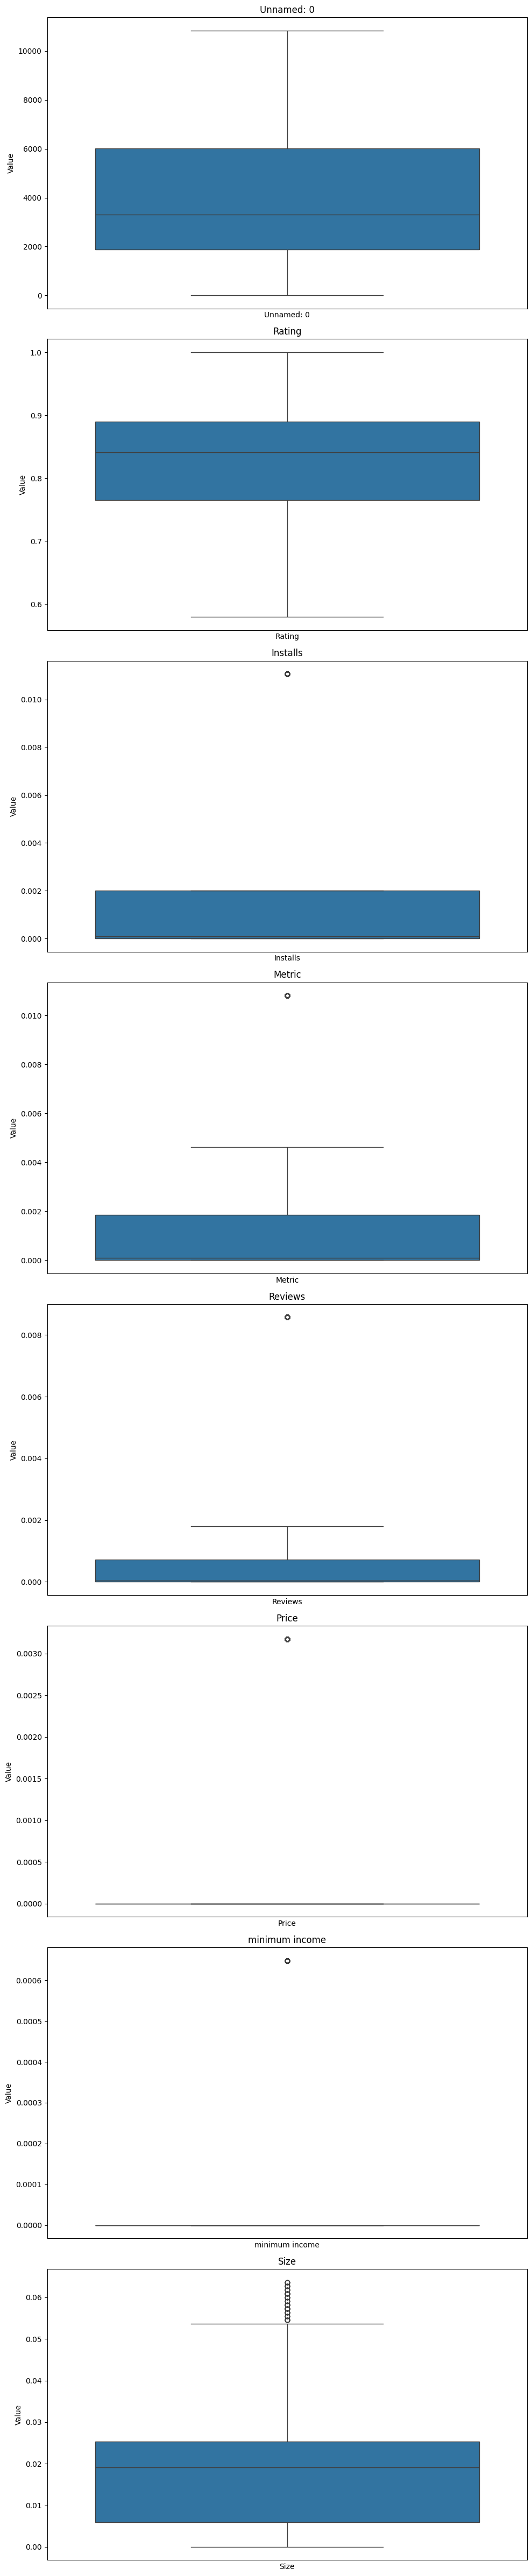

In [33]:
# box plots for numeric data
to_show = df.select_dtypes(include=["number"])
fig, axes = plt.subplots(
    nrows=len(to_show.columns), ncols=1, figsize=(10, 6 * len(to_show.columns))
)
for i, (col_name, col_data) in enumerate(to_show.items()):
    sns.boxplot(col_data, ax=axes[i])
    axes[i].set_title(col_name)
    axes[i].set_xlabel(col_name)
    axes[i].set_ylabel("Value")
    axes[i].set_xticks([])
plt.tight_layout()
plt.show()